In [1]:
!pip install pandas

     ---------------------------------------- 10.4/10.4 MB 2.2 MB/s eta 0:00:00
     -------------------------------------- 500.6/500.6 kB 1.5 MB/s eta 0:00:00


In [3]:
import torch
import torch.optim as o
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('../data/cars.csv', index_col='Unnamed: 0')
df

,speed,dist
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10
7,10,18
8,10,26
9,10,34
10,11,17


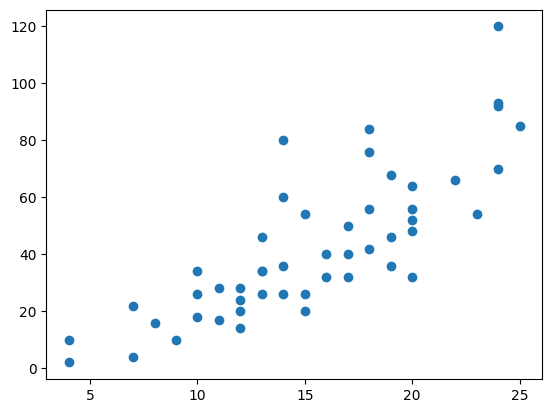

In [8]:
plt.scatter(df['speed'], df['dist'])
plt.show()

#### 딥러닝에 적합한 데이터?? 상관관계

In [9]:
df.corr()

,speed,dist
speed,1.000000,0.806895
dist,0.806895,1.000000


- r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
- r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
- r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
- r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
- r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
- r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
- r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계

https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D

In [13]:
df['speed']

1      4
2      4
3      7
4      7
5      8
6      9
7     10
8     10
9     10
10    11
11    11
12    12
13    12
14    12
15    12
16    13
17    13
18    13
19    13
20    14
21    14
22    14
23    14
24    15
25    15
26    15
27    16
28    16
29    17
30    17
31    17
32    18
33    18
34    18
35    18
36    19
37    19
38    19
39    20
40    20
41    20
42    20
43    20
44    22
45    23
46    24
47    24
48    24
49    24
50    25
Name: speed, dtype: int64

In [12]:
df['speed'].values

array([ 4,  4,  7,  7,  8,  9, 10, 10, 10, 11, 11, 12, 12, 12, 12, 13, 13,
       13, 13, 14, 14, 14, 14, 15, 15, 15, 16, 16, 17, 17, 17, 18, 18, 18,
       18, 19, 19, 19, 20, 20, 20, 20, 20, 22, 23, 24, 24, 24, 24, 25],
      dtype=int64)

In [11]:
x = torch.FloatTensor(df['speed'].values) # 특성 데이터
y = torch.FloatTensor(df['dist'].values) # 라벨

In [18]:
w = torch.empty(1, requires_grad=True)
b = torch.empty(1, requires_grad=True)
torch.nn.init.uniform_(w)
torch.nn.init.uniform_(b)

tensor([0.0643], requires_grad=True)

In [19]:
def cost():
    hx = w*x+b
    c = torch.mean( (hx-y)**2)
    return c

In [28]:
optimizer = o.Adam([w,b], lr=0.01)
for i in range(2000):
    c = cost()
    optimizer.zero_grad()
    c.backward()
    optimizer.step()
    print(i, 'cost=', c.item())

0 cost= 227.6544189453125
1 cost= 227.67300415039062
2 cost= 227.64523315429688
3 cost= 227.64883422851562
4 cost= 227.6521453857422
5 cost= 227.6420135498047
6 cost= 227.6294708251953
7 cost= 227.62290954589844
8 cost= 227.6221160888672
9 cost= 227.6208953857422
10 cost= 227.6152801513672
11 cost= 227.60716247558594
12 cost= 227.60035705566406
13 cost= 227.5966339111328
14 cost= 227.5945281982422
15 cost= 227.59129333496094
16 cost= 227.58587646484375
17 cost= 227.5795440673828
18 cost= 227.57406616210938
19 cost= 227.5701904296875
20 cost= 227.56710815429688
21 cost= 227.56324768066406
22 cost= 227.5583038330078
23 cost= 227.55296325683594
24 cost= 227.54832458496094
25 cost= 227.54458618164062
26 cost= 227.5410614013672
27 cost= 227.5370330810547
28 cost= 227.53237915039062
29 cost= 227.52769470214844
30 cost= 227.5234832763672
31 cost= 227.5197296142578
32 cost= 227.51602172851562
33 cost= 227.51185607910156
34 cost= 227.50747680664062
35 cost= 227.50328063964844
36 cost= 227.49945

608 cost= 227.07040405273438
609 cost= 227.0704345703125
610 cost= 227.0704345703125
611 cost= 227.07046508789062
612 cost= 227.0704345703125
613 cost= 227.07040405273438
614 cost= 227.0704345703125
615 cost= 227.07044982910156
616 cost= 227.07044982910156
617 cost= 227.0704345703125
618 cost= 227.07046508789062
619 cost= 227.0704345703125
620 cost= 227.0704345703125
621 cost= 227.0704345703125
622 cost= 227.0704345703125
623 cost= 227.0704345703125
624 cost= 227.0704345703125
625 cost= 227.07046508789062
626 cost= 227.07040405273438
627 cost= 227.0704345703125
628 cost= 227.0704345703125
629 cost= 227.0704345703125
630 cost= 227.07044982910156
631 cost= 227.07046508789062
632 cost= 227.0704345703125
633 cost= 227.07044982910156
634 cost= 227.0704345703125
635 cost= 227.07040405273438
636 cost= 227.07040405273438
637 cost= 227.0704345703125
638 cost= 227.07040405273438
639 cost= 227.0704345703125
640 cost= 227.0703887939453
641 cost= 227.07044982910156
642 cost= 227.07040405273438
643 

1152 cost= 227.07040405273438
1153 cost= 227.07040405273438
1154 cost= 227.07040405273438
1155 cost= 227.07044982910156
1156 cost= 227.0704345703125
1157 cost= 227.07044982910156
1158 cost= 227.07040405273438
1159 cost= 227.07040405273438
1160 cost= 227.07040405273438
1161 cost= 227.07040405273438
1162 cost= 227.07044982910156
1163 cost= 227.07040405273438
1164 cost= 227.07044982910156
1165 cost= 227.07044982910156
1166 cost= 227.07040405273438
1167 cost= 227.07044982910156
1168 cost= 227.07044982910156
1169 cost= 227.07040405273438
1170 cost= 227.07044982910156
1171 cost= 227.07044982910156
1172 cost= 227.07044982910156
1173 cost= 227.07040405273438
1174 cost= 227.07044982910156
1175 cost= 227.07044982910156
1176 cost= 227.07040405273438
1177 cost= 227.07044982910156
1178 cost= 227.07044982910156
1179 cost= 227.07040405273438
1180 cost= 227.07040405273438
1181 cost= 227.07040405273438
1182 cost= 227.07044982910156
1183 cost= 227.07044982910156
1184 cost= 227.07040405273438
1185 cost= 

1708 cost= 227.07040405273438
1709 cost= 227.07044982910156
1710 cost= 227.07044982910156
1711 cost= 227.0703887939453
1712 cost= 227.07040405273438
1713 cost= 227.0703887939453
1714 cost= 227.07044982910156
1715 cost= 227.07040405273438
1716 cost= 227.07044982910156
1717 cost= 227.07044982910156
1718 cost= 227.0703887939453
1719 cost= 227.07040405273438
1720 cost= 227.0703887939453
1721 cost= 227.07044982910156
1722 cost= 227.07040405273438
1723 cost= 227.07044982910156
1724 cost= 227.07044982910156
1725 cost= 227.0703887939453
1726 cost= 227.07040405273438
1727 cost= 227.0703887939453
1728 cost= 227.07044982910156
1729 cost= 227.07040405273438
1730 cost= 227.07044982910156
1731 cost= 227.07044982910156
1732 cost= 227.0703887939453
1733 cost= 227.07040405273438
1734 cost= 227.0703887939453
1735 cost= 227.07044982910156
1736 cost= 227.07040405273438
1737 cost= 227.07044982910156
1738 cost= 227.07044982910156
1739 cost= 227.0703887939453
1740 cost= 227.07040405273438
1741 cost= 227.0703

In [29]:
w

tensor([3.9322], requires_grad=True)

In [30]:
b

tensor([-17.5791], requires_grad=True)

In [35]:
def hxFn(xd):
    xd = torch.tensor(xd, dtype=torch.float32)
    hx = w*xd+b
    return hx

In [36]:
hxFn(10)

tensor([21.7429], grad_fn=<AddBackward0>)

In [37]:
hxFn([15,20])

tensor([41.4039, 61.0650], grad_fn=<AddBackward0>)

In [39]:
pred = hxFn(x)

C:\Users\wsadm\AppData\Local\Temp\ipykernel_11180\2650635438.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xd = torch.tensor(xd, dtype=torch.float32)


In [40]:
pred

tensor([-1.8503, -1.8503,  9.9463,  9.9463, 13.8785, 17.8107, 21.7429, 21.7429,
        21.7429, 25.6751, 25.6751, 29.6073, 29.6073, 29.6073, 29.6073, 33.5395,
        33.5395, 33.5395, 33.5395, 37.4717, 37.4717, 37.4717, 37.4717, 41.4039,
        41.4039, 41.4039, 45.3362, 45.3362, 49.2684, 49.2684, 49.2684, 53.2006,
        53.2006, 53.2006, 53.2006, 57.1328, 57.1328, 57.1328, 61.0650, 61.0650,
        61.0650, 61.0650, 61.0650, 68.9294, 72.8616, 76.7938, 76.7938, 76.7938,
        76.7938, 80.7260], grad_fn=<AddBackward0>)

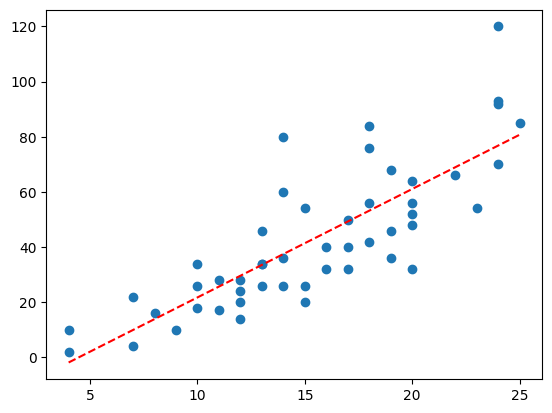

In [43]:
plt.scatter(df['speed'], df['dist'])
plt.plot(df['speed'], pred.detach().numpy(), 'r--') # r-- : Red, dashed line
plt.show()

### 퀴즈
- electric.csv 파일을 읽어서 전기 생산량, 전기 사용량
- 전기생산량이 4.5인경우 전기 사용량을 예측하시요
- 전체데이터 scatter, 예측선을 그리시요.

In [81]:
df = pd.read_csv('../data/electric.csv', index_col='Unnamed: 0')
df

,전기생산량,전기사용량
0,3.52,2.48
1,2.58,2.27
2,3.31,2.47
3,4.07,2.77
4,4.62,2.98
5,3.98,3.05
6,4.29,3.18
7,4.83,3.46
8,3.71,3.03
9,4.61,3.25


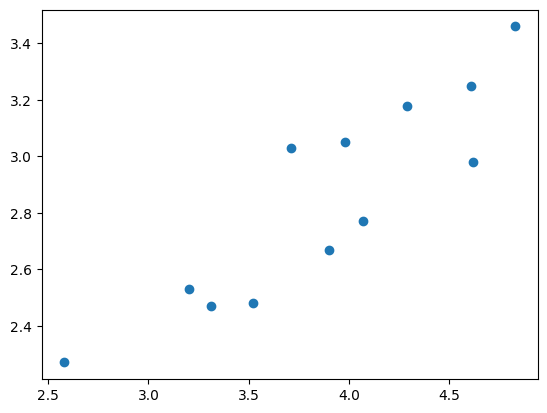

In [82]:
plt.scatter(df['전기생산량'], df['전기사용량'])
plt.show()

In [83]:
df.corr()

,전기생산량,전기사용량
전기생산량,1.000000,0.892924
전기사용량,0.892924,1.000000


In [84]:
x = torch.FloatTensor(df['전기생산량'].values) # 특성 데이터
y = torch.FloatTensor(df['전기사용량'].values) # 라벨

In [85]:
w = torch.empty(1, requires_grad=True)
b = torch.empty(1, requires_grad=True)
torch.nn.init.uniform_(w)
torch.nn.init.uniform_(b)

tensor([0.1939], requires_grad=True)

In [93]:
def cost():
    hx = w*x+b
    c = torch.mean( (hx-y)**2)
    return c

In [94]:
optimizer = o.Adam([w,b], lr=0.01)
for i in range(2000):
    c = cost()
    optimizer.zero_grad()
    c.backward()
    optimizer.step() # 미분 + 추가기능
    print(i, 'cost=', c.item())

0 cost= 0.025148475542664528
1 cost= 0.027071982622146606
2 cost= 0.02520032785832882
3 cost= 0.02581724524497986
4 cost= 0.026363389566540718
5 cost= 0.025827407836914062
6 cost= 0.02523134835064411
7 cost= 0.025227880105376244
8 cost= 0.025609759613871574
9 cost= 0.025768786668777466
10 cost= 0.02554689161479473
11 cost= 0.025241149589419365
12 cost= 0.025154637172818184
13 cost= 0.025308622047305107
14 cost= 0.025470735505223274
15 cost= 0.02545047551393509
16 cost= 0.02528923563659191
17 cost= 0.025160707533359528
18 cost= 0.025174500420689583
19 cost= 0.02527887187898159
20 cost= 0.025338033214211464
21 cost= 0.02528909035027027
22 cost= 0.025192908942699432
23 cost= 0.025148464366793633
24 cost= 0.025185605511069298
25 cost= 0.025244146585464478
26 cost= 0.02525155059993267
27 cost= 0.025203116238117218
28 cost= 0.025155289098620415
29 cost= 0.025154991075396538
30 cost= 0.025190161541104317
31 cost= 0.025211632251739502
32 cost= 0.02519404888153076
33 cost= 0.025160551071166992


572 cost= 0.02514844946563244
573 cost= 0.02514844946563244
574 cost= 0.025148466229438782
575 cost= 0.025148481130599976
576 cost= 0.025148453190922737
577 cost= 0.025148456916213036
578 cost= 0.025148453190922737
579 cost= 0.025148438289761543
580 cost= 0.025148438289761543
581 cost= 0.025148453190922737
582 cost= 0.02514844946563244
583 cost= 0.025148451328277588
584 cost= 0.025148451328277588
585 cost= 0.025148451328277588
586 cost= 0.025148475542664528
587 cost= 0.025148453190922737
588 cost= 0.025148453190922737
589 cost= 0.025148458778858185
590 cost= 0.025148453190922737
591 cost= 0.025148453190922737
592 cost= 0.025148458778858185
593 cost= 0.025148453190922737
594 cost= 0.025148453190922737
595 cost= 0.025148453190922737
596 cost= 0.025148453190922737
597 cost= 0.025148458778858185
598 cost= 0.025148453190922737
599 cost= 0.025148458778858185
600 cost= 0.025148453190922737
601 cost= 0.025148475542664528
602 cost= 0.025148451328277588
603 cost= 0.025148451328277588
604 cost= 0

1037 cost= 0.025148451328277588
1038 cost= 0.025148451328277588
1039 cost= 0.025148466229438782
1040 cost= 0.025148466229438782
1041 cost= 0.025148453190922737
1042 cost= 0.025148453190922737
1043 cost= 0.025148453190922737
1044 cost= 0.02514846809208393
1045 cost= 0.025148453190922737
1046 cost= 0.025148453190922737
1047 cost= 0.025148438289761543
1048 cost= 0.025148453190922737
1049 cost= 0.02514844946563244
1050 cost= 0.025148466229438782
1051 cost= 0.025148451328277588
1052 cost= 0.025148475542664528
1053 cost= 0.025148453190922737
1054 cost= 0.025148458778858185
1055 cost= 0.025148453190922737
1056 cost= 0.025148475542664528
1057 cost= 0.025148451328277588
1058 cost= 0.025148475542664528
1059 cost= 0.025148475542664528
1060 cost= 0.025148475542664528
1061 cost= 0.025148475542664528
1062 cost= 0.025148475542664528
1063 cost= 0.025148475542664528
1064 cost= 0.025148475542664528
1065 cost= 0.025148475542664528
1066 cost= 0.025148475542664528
1067 cost= 0.025148475542664528
1068 cost=

1573 cost= 0.025148456916213036
1574 cost= 0.025148451328277588
1575 cost= 0.025148466229438782
1576 cost= 0.02514844946563244
1577 cost= 0.025148438289761543
1578 cost= 0.025148453190922737
1579 cost= 0.025148453190922737
1580 cost= 0.025148466229438782
1581 cost= 0.025148466229438782
1582 cost= 0.025148451328277588
1583 cost= 0.025148475542664528
1584 cost= 0.025148453190922737
1585 cost= 0.025148453190922737
1586 cost= 0.025148458778858185
1587 cost= 0.025148453190922737
1588 cost= 0.025148453190922737
1589 cost= 0.025148475542664528
1590 cost= 0.025148451328277588
1591 cost= 0.02514844946563244
1592 cost= 0.025148451328277588
1593 cost= 0.025148475542664528
1594 cost= 0.025148453190922737
1595 cost= 0.025148475542664528
1596 cost= 0.025148451328277588
1597 cost= 0.025148451328277588
1598 cost= 0.025148451328277588
1599 cost= 0.025148466229438782
1600 cost= 0.025148466229438782
1601 cost= 0.025148451328277588
1602 cost= 0.025148475542664528
1603 cost= 0.025148453190922737
1604 cost=

In [95]:
w

tensor([0.4956], requires_grad=True)

In [96]:
b

tensor([0.9196], requires_grad=True)

In [108]:
def hxFn(xd):
    xd = torch.tensor(xd, dtype=torch.float32)
    hx = w*xd+b
    return hx.detach().numpy()

In [109]:
hxFn(4.5)

array([3.149796], dtype=float32)

In [110]:
pred = hxFn(x)

C:\Users\wsadm\AppData\Local\Temp\ipykernel_11180\355988460.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xd = torch.tensor(xd, dtype=torch.float32)


In [111]:
pred

array([2.664105 , 2.198238 , 2.5600283, 2.9366868, 3.2092683, 2.8920825,
       3.0457194, 3.3133452, 2.7582695, 3.2043126, 2.8524342, 2.505512 ],
      dtype=float32)

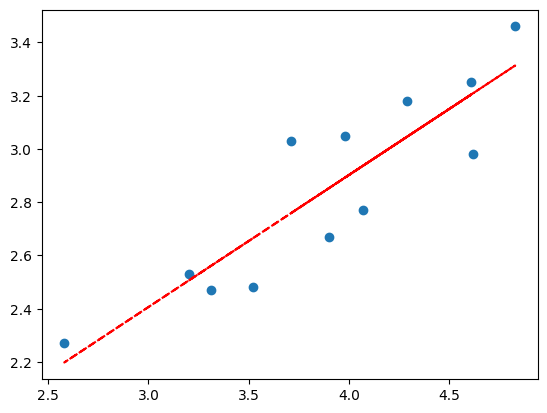

In [113]:
#plt.cla()
#plt.clf()
plt.scatter(df['전기생산량'], df['전기사용량'])
plt.plot(df['전기생산량'], pred, 'r--') # r-- : Red, dashed line
plt.show()